In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

# LAI

In [12]:
# load data
dx_lai = xr.open_dataset('data/leaf_area_index/historical/GFDL-ESM4/lai_Lmon_GFDL-ESM4_historical_r1i1p1f1_185001-201412.nc')

- time_bnds: (time=1980,bnds=2) with bnds giving start and end time  (year,month,day) but will be always monthly
- lai: (time=1980,lat:36,lon:72) giving lai index for each time slice at each location

In [17]:
dx_lai.lai.loc['1850-03-16':'1850-10-16']

<xarray.DataArray 'lai' (time: 8, lat: 36, lon: 72)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       ...,

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-03-16 12:00:00 ... 1850-10-16 12:00:00
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Attributes:
    standard_name:    leaf_area_index
    long_name:        Leaf Area Index
    units:            1
    cell_methods:     area: mean where land time: mean
    ocean_fillvalue:  0.0
    cell_measures:    area: areacella
    interp_method:    conserve_order1
    original_name:    lai
    comment:          land_area = areacella * sftlf * 0.01

In [9]:
dx_lai.time_bnds[3] 

<xarray.DataArray 'time_bnds' (bnds: 2)>
array([cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
    time     object 1850-03-16 12:00:00
Dimensions without coordinates: bnds

LAI index from <xarray.DataArray 'time_bnds' ()>
array(cftime.DatetimeNoLeap(1850, 1, 1, 0, 0, 0, 0), dtype=object)
Coordinates:
    time     object 1850-01-16 12:00:00 to <xarray.DataArray 'time_bnds' ()>
array(cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0), dtype=object)
Coordinates:
    time     object 1850-01-16 12:00:00


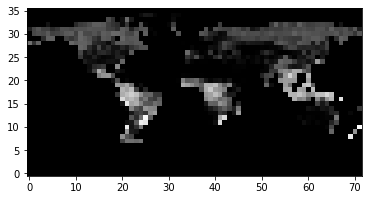

In [62]:
timeindex = 0
plt.imshow(dx_lai.lai[timeindex], cmap='gray', origin='lower')
print('LAI index from {} to {}'.format(dx_lai.time_bnds[timeindex,0], dx_lai.time_bnds[timeindex,1]))

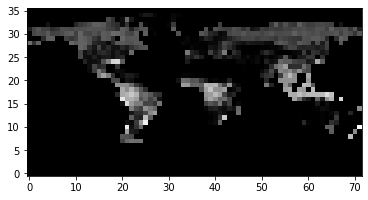

In [64]:
plt.rcParams["animation.html"] = "jshtml"  # allow animation for jupyter
frames = []  # append each image
fig = plt.figure()
for timeindex in range(120):  # animate for 10 yrs
    frames.append([plt.imshow(dx_lai.lai[timeindex], cmap='gray', origin='lower', animated=True)])
ani = matplotlib.animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani

# NPP

In [65]:
dx_npp = xr.open_dataset('data/net_primary_production_on_land/historical/CMCC-CM2-SR5/npp_Lmon_CMCC-CM2-SR5_historical_r1i1p1f1_185001-201412.nc')

In [66]:
dx_npp

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 36, lon: 72, time: 1980)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon        (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat        (lat) float64 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    npp        (time, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.9 (https://mpi...
    source:                 CMCC-CM2-SR5 (2016): \naerosol: MAM3\natmos: CAM5...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    contact:                T. Lovato
    creation_date:          2020-05-27T12:15:07Z
    data_specs_version:     01.00.31
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC-CM...
    grid:                   native land regular grid
    grid_label:             gn
    history:                Mon Jan 04 12:57:26 2021: cdo remapbil,5_grid_par...
    initialization_index:   1
    institution_id:         CMCC
    mip_era:                CMIP6
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CMCC-CM2-SR5
    parent_time_units:      days since 1850-01-01
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  land
    references:             none
    run_variant:            1st realization
    source_id:              CMCC-CM2-SR5
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Lmon
    table_info:             Creation Date:(05 February 2020) MD5:6a248fd76c55...
    title:                  CMCC-CM2-SR5 output prepared for CMIP6
    variable_id:            npp
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/f9c6673c-7e88-47e3-8822-5f91fd0fdb4e
    CDO:                    Climate Data Operators version 1.9.9 (https://mpi...

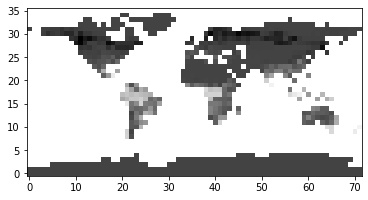

In [67]:
plt.rcParams["animation.html"] = "jshtml"  # allow animation for jupyter
frames = []  # append each image
fig = plt.figure()
for timeindex in range(120):  # animate for 10 yrs
    frames.append([plt.imshow(dx_npp.npp[timeindex], cmap='gray', origin='lower', animated=True)])
ani_npp = matplotlib.animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani_npp

Maybe we should rather predict each month with separate models

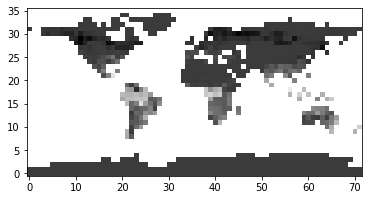

In [69]:
plt.rcParams["animation.html"] = "jshtml"  # allow animation for jupyter
frames = []  # append each image
fig = plt.figure()
for timeindex in range(100):  # animate for 100 yrs january
    frames.append([plt.imshow(dx_npp.npp[timeindex*12], cmap='gray', origin='lower', animated=True)])
ani_npp_monthly = matplotlib.animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani_npp_monthly

# Precipitation
daily data. To generated dataset, it will be necessary to match time correctly for monthly and daily data

In [4]:
dx_prec = xr.open_dataset('data/precipitation_flux/historical/GFDL-ESM4/gfdl-esm4_r1i1p1f1_w5e5_historical_pr_global_daily_2011_2014.nc')

In [7]:
dx_prec.time

<xarray.DataArray 'time' (time: 1461)>
array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', ..., '2014-12-29T00:00:00.000000000',
       '2014-12-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2014-12-31
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

Open multiples

In [3]:
dx_multi = xr.open_mfdataset('data/precipitation_flux/historical/GFDL-ESM4/*.nc')

In [6]:
dx_multi.pr.shape

(60265, 36, 72)